## Initialization

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
import numpy as np
import scipy.optimize as optimization
import pandas as pd
from curvefit import *
import sys

def func(x, a, b, c, d, e):
    return a + b*x + c*x*x + d*x*x*x + e*x*x*x*x

def Z(S,B):
    return S/np.sqrt(S+B)

def significance(XS,Eff,Lumi,TB):
    Evts=Lumi*(XS.transpose())*(Eff/100)
    return Z(Evts,TB)

# LUMINOSITY = 30 fb-1


## High MH+ 

In [38]:
Zvv=500.
TB=Zvv/0.7

df=pd.DataFrame()
MHp=700 #MH+
Lumis=[30000.,100000.]
LaL=np.array([0.01,0.02,0.05,0.07,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.0,3.0,5.0,7.0,10.0])
MH0=np.array([70,75,80,85,90,110,130,150,170,190,210,220,240])
XS=np.array([[0.00783607575629,0.00747482126337,0.0070754665236,0.0067536191246,0.0064510490936,0.00541729727502,0.00450514743728,0.00375921068237,0.00320540710897,0.00267848607156,0.00227665480784,0.00209697543768,0.00175175111731],[0.00820650858184,0.00777080218416,0.00734962798323,0.0069370100351,0.0066226838262,0.00552263250849,0.00459905776702,0.00384839961038,0.00321932258602,0.00266578919844,0.00224653784862,0.00206443852413,0.00175533185608],[0.00977036213144,0.00881650013264,0.00813644023049,0.00763551355176,0.00719752367893,0.00577411696313,0.00474742502055,0.00397919891226,0.00328311418054,0.00278081244384,0.00231507054359,0.00210931366709,0.00177590124026],[0.011420910156,0.00991723213372,0.0089898149608,0.00827525303364,0.00762911789735,0.00604103126321,0.00491831776786,0.00407360249129,0.00339849158687,0.00282520633474,0.00235567126882,0.00215982084251,0.00180423451155],[0.0141261425284,0.0115380580022,0.0100772508372,0.00913874460108,0.00830156542016,0.00640568666986,0.00510558102448,0.00419036053004,0.00346030010049,0.0028745840313,0.00239995296473,0.00218483771474,0.00184266632757],[0.0199244023107,0.0150710532694,0.0125500477084,0.0109981420566,0.00976696266413,0.0070938080392,0.00542679204951,0.00442523806302,0.00363703285801,0.00297419670822,0.00249216109259,0.00225890914297,0.00188309960197],[0.0271880899908,0.0197415176028,0.0158114945573,0.0133155110342,0.0117125410659,0.00799662341219,0.00602154446212,0.00473041583628,0.00385873942405,0.00315903944048,0.00254254399698,0.00233999204944,0.00194357104849],[0.0368390612651,0.0252109121861,0.0194860982444,0.0161147716505,0.0137569481748,0.00881569794804,0.0064548956078,0.005012030082,0.00405513563802,0.00323430260427,0.00265472306713,0.00243026454045,0.0019829645914],[0.0477417695661,0.0316975111695,0.0238740797744,0.0192376955626,0.0161976627504,0.00998088027677,0.00712239023152,0.00538841435699,0.00422531855685,0.00341865377609,0.00278731658182,0.00250914774171,0.00207481178219],[0.0597594640654,0.0391662561018,0.028821592883,0.022677722633,0.0188525187018,0.0111328469037,0.00775519019637,0.00574773540242,0.00451934291073,0.00355335003647,0.00289616277128,0.00261797622203,0.0021114508465],[0.0747956609518,0.0471382414448,0.0344983621758,0.0269670368818,0.0218295047684,0.0123661452119,0.00837222196693,0.00609279302469,0.00471057123249,0.00377991267025,0.00298606059531,0.00268121291098,0.00219558795724],[0.0910331287797,0.0567195719991,0.0403238163796,0.0310156215494,0.0250082748573,0.0136586156079,0.00907664301072,0.00658094533258,0.00500074299141,0.0039222600236,0.00312041844648,0.00277151342242,0.00228000711703],[0.107349388867,0.0656615481849,0.0465501253039,0.0360118243404,0.028576983123,0.0150524151214,0.00974113895248,0.0069750996649,0.00531461201434,0.00406819587094,0.00324091018643,0.00291883552383,0.00234128604466],[0.128043336128,0.0776237164167,0.0546097312013,0.0411755041257,0.0329947443675,0.0168543255501,0.0105431991354,0.00757444269303,0.00555879160621,0.00436459889587,0.00336931176585,0.00304028612383,0.00243809329108],[0.148695199269,0.090430645976,0.062674638844,0.0468132159563,0.0371150703981,0.018467720921,0.0116123492597,0.00802164436335,0.00582249375999,0.00456686473905,0.00353584411056,0.00318931593753,0.00255718993958],[0.380151397212,0.220473347428,0.148378942205,0.10656002523,0.0813605039088,0.0363423812252,0.020356914933,0.0130089520647,0.0090585052076,0.00652376877811,0.00489306516721,0.00423612392131,0.00329366179214],[3.24118473343,1.80212692796,1.17242330113,0.806867070297,0.603144333312,0.232872807677,0.114865352706,0.0646187944466,0.039699264752,0.0258472880513,0.0176354821901,0.0144681451833,0.0104482973562],[8.89427127628,4.92561586887,3.21912245078,2.25165545869,1.66314074829,0.635800506275,0.307443775785,0.168008418494,0.0996303321782,0.0623872431225,0.0417083022784,0.0340446574429,0.0238635636445],[17.8456821254,10.0440353143,6.56851555905,4.60076987107,3.39608947093,1.29049388377,0.62990145001,0.340561430381,0.198830653949,0.125181831838,0.082151306954,0.0657439627299,0.0453819909586],[38.1134563225,21.7394077983,14.2477022061,10.24165998,7.58446024417,2.96801902408,1.44282132676,0.785372567661,0.455678455194,0.281172708507,0.181313261152,0.145525755642,0.0986417773555]])
Eff=np.array([[4.266389177939646, 5.104166666666667, 5.056759545923633, 4.855371900826446, 5.925155925155925, 6.029106029106029, 5.405405405405405, 3.9337474120082816, 5.882352941176471, 4.024767801857585, 3.711340206185567, 3.112033195020747, 2.883625128733265, 4.72764645426516, 2.7892561983471076, 3.4232365145228214, 2.8125, 2.158273381294964, 1.5432098765432098, 1.842374616171955],[4.878048780487805, 4.179728317659352, 6.139438085327783, 5.077720207253886, 5.807814149947202, 6.340956340956341, 4.916317991631799, 4.158004158004158, 4.488517745302714, 5.318039624608968, 4.583333333333333, 4.126984126984127, 4.612159329140461, 3.905447070914697, 4.564315352697095, 3.374233128834356, 3.58974358974359, 2.6859504132231407, 2.4691358024691357, 1.8329938900203666],[4.1623309053069715, 5.090137857900318, 4.680851063829787, 7.142857142857143, 5.7591623036649215, 4.702194357366771, 5.2301255230125525, 5.735140771637122, 5.192107995846314, 5.648535564853557, 6.521739130434782, 5.104166666666667, 4.72193074501574, 4.2752867570385815, 3.7267080745341614, 3.4161490683229814, 3.4055727554179565, 2.674897119341564, 3.501544799176107, 1.629327902240326],[5.186721991701245, 5.175983436853002, 6.15866388308977, 5.38860103626943, 4.311251314405888, 3.473684210526316, 4.512067156348373, 5.08298755186722, 5.175983436853002, 6.204756980351603, 5.77124868835257, 4.235537190082645, 4.947368421052632, 4.8353909465020575, 4.658385093167702, 3.7460978147762747, 3.29557157569516, 2.579979360165119, 1.954732510288066, 1.5337423312883436],[6.673728813559322, 4.439746300211416, 5.857740585774058, 5.654450261780105, 5.69620253164557, 5.2356020942408374, 5.931321540062435, 4.668049792531121, 5.503634475597092, 4.916317991631799, 4.826862539349423, 5.136268343815513, 4.916317991631799, 4.569055036344756, 4.583333333333333, 5.104166666666667, 3.9215686274509802, 3.822314049586777, 2.263374485596708, 1.9387755102040816],[6.327800829875518, 5.077720207253886, 4.041450777202073, 6.309148264984227, 4.811715481171548, 3.907074973600845, 5.968586387434555, 4.483837330552659, 5.093555093555094, 5.077720207253886, 5.042016806722689, 4.7418335089567965, 6.1139896373057, 5.279503105590062, 5.584281282316443, 4.66321243523316, 3.71900826446281, 4.123711340206185, 3.4161490683229814, 2.7522935779816513],[5.368421052631579, 4.682622268470343, 4.72193074501574, 5.306971904266389, 5.368421052631579, 4.953560371517028, 6.197478991596639, 4.756980351602896, 5.368421052631579, 5.29595015576324, 7.210031347962382, 5.031446540880503, 4.6875, 7.596253902185223, 5.9436913451511995, 5.093555093555094, 3.9542143600416235, 3.508771929824561, 3.172978505629478, 3.711340206185567],[4.636459430979979, 5.219206680584551, 4.994686503719447, 4.37956204379562, 5.46218487394958, 6.342494714587738, 5.7591623036649215, 5.543933054393306, 6.282722513089006, 5.7531380753138075, 4.931794333683106, 5.323590814196242, 5.96234309623431, 5.383022774327122, 4.831932773109243, 5.8212058212058215, 4.747162022703819, 4.410256410256411, 2.7720739219712525, 3.873598369011213],[3.199174406604747, 4.43298969072165, 4.375, 3.008298755186722, 3.441084462982273, 3.067484662576687, 2.2082018927444795, 2.57201646090535, 1.9874476987447698, 1.8518518518518519, 2.57201646090535, 1.875, 1.981230448383733, 1.7782426778242677, 1.7838405036726128, 1.36986301369863, 1.2435233160621761, 1.256544502617801, 1.365546218487395, 1.0298661174047374],[4.241781548250265, 5.613305613305613, 4.016477857878476, 3.0239833159541187, 3.757828810020877, 2.7921406411582215, 3.125, 2.4870466321243523, 2.8095733610822062, 2.059732234809475, 3.490759753593429, 1.975051975051975, 1.5608740894901145, 1.4492753623188406, 1.9668737060041408, 1.4462809917355373, 1.7400204708290685, 1.954732510288066, 1.1506276150627615, 1.1482254697286012],[4.895833333333333, 3.4627492130115427, 4.712041884816754, 3.7735849056603774, 4.0582726326742975, 3.913491246138002, 3.586497890295359, 3.638253638253638, 3.4161490683229814, 3.209109730848861, 2.286902286902287, 2.47167868177137, 2.9804727646454263, 2.5906735751295336, 2.1761658031088085, 1.5657620041753653, 1.8691588785046729, 1.4553014553014554, 2.0876826722338206, 1.251303441084463],[5.3125, 6.145833333333333, 4.692387904066736, 4.075235109717869, 4.597701149425287, 3.653444676409186, 3.1023784901758016, 3.402061855670103, 4.253112033195021, 4.024767801857585, 3.8906414300736065, 3.0239833159541187, 3.2528856243441764, 3.2854209445585214, 3.490759753593429, 2.36382322713258, 2.7720739219712525, 1.3388259526261586, 1.5511892450879008, 1.9467213114754098],[4.149377593360996, 4.416403785488959, 4.6777546777546775, 4.054054054054054, 5.174234424498416, 4.248704663212435, 3.426791277258567, 3.3057851239669422, 3.6496350364963503, 2.272727272727273, 2.7139874739039667, 4.028925619834711, 3.319502074688797, 2.711157455683003, 3.209109730848861, 2.9958677685950414, 2.4896265560165975, 2.2540983606557377, 2.277432712215321, 1.3238289205702647]])
for Lumi in Lumis:
    Significance=significance(XS,Eff,Lumi,TB)
    for i in range(LaL.shape[0]):
        df=df.append({'MHp':MHp,'Luminosity':Lumi,'LaL':LaL[i],'MH0':MH0,'XS':XS[i],'Eff':Eff.transpose()[i],\
                      'Significance':Significance.transpose()[i]},ignore_index=True)

In [39]:
MHp=250 #MH+
Lumis=[30000.,100000.]
LaL=np.array([0.01,0.1,0.5,1.0,5.0,10.0])
MH0=np.array([70,75,80,85,90,110,130,150,190,210,220,240])
XS=np.array([[0.0349202532,0.0334004548,0.0317959539,0.0299136009,0.0284446578,0.0231171019,0.0182469057,0.0145908085,0.0032957252,0.0008311599,0.0002327398,2.69170669596E-005],[0.0401153803,0.0365328119,0.0339879003,0.0318100305,0.0299869285,0.0236790908,0.018614465,0.0148075782,0.0033628365,0.0008528258,0.0002575083,3.76243302046E-005],[0.1292954556,0.0877346517,0.0671422842,0.055387881,0.0473004018,0.0303751277,0.0220217644,0.0166179432,0.003983908,0.0012414054,0.0005508421,0.000212817],[0.3925881269,0.235609451,0.163829771,0.1215055018,0.0961519127,0.0487745888,0.0302338164,0.0211453691,0.0056017643,0.002215103,0.0013337227,0.0007131346],[8.8106015968,4.9330438839,3.2202837071,2.2445297762,1.6530410394,0.6298478626,0.2986637424,0.1646727753,0.0551913027,0.0339149853,0.0267049906,0.0175325777],[37.5523833824,21.5683403078,14.1510102501,10.1290781829,7.4208955246,2.883369972,1.3888054495,0.750051374,0.260519149,0.1647700939,0.1322070255,0.0871119659]])
Eff=np.array([[0.10438413361169102, 0.5230125523012552, 1.142263759086189, 1.3555787278415015, 1.4462809917355373, 1.2461059190031152], [0.2066115702479339, 0.625, 0.9394572025052192, 1.3499480789200415, 2.2821576763485476, 0.8359456635318704], [0.2070393374741201, 0.4175365344467641, 1.2396694214876034, 0.9297520661157025, 1.6684045881126173, 1.9771071800208118], [0.10471204188481675, 0.1037344398340249, 1.5723270440251573, 1.2474012474012475, 1.6528925619834711, 1.037344398340249], [0.0, 0.10482180293501048, 0.8221993833504625, 1.4598540145985401, 0.82389289392379, 1.435897435897436], [0.20639834881320948, 0.31088082901554404, 1.1387163561076605, 1.45681581685744, 1.3347022587268993, 0.8264462809917356], [0.20639834881320948, 0.30991735537190085, 0.6211180124223602, 1.5321756894790604, 2.5693730729701953, 1.0245901639344261], [0.2074688796680498, 0.10330578512396695, 0.8171603677221655, 1.2539184952978057, 1.6494845360824741, 1.7329255861365953], [0.0, 0.1180637544273908, 0.7821229050279329, 2.549889135254989, 2.378490175801448, 2.443991853360489], [0.684931506849315, 0.2604166666666667, 1.7921146953405018, 2.137232845894263, 2.6859504132231407, 3.8578680203045685], [1.0810810810810811, 1.4397905759162304, 3.939745075318656, 2.912621359223301, 3.615702479338843, 2.032520325203252], [3.814432989690722, 4.732510288065844, 3.6923076923076925, 2.3613963039014374, 2.5510204081632653, 2.443991853360489]])
for Lumi in Lumis:
    Significance=significance(XS,Eff,Lumi,TB)
    for i in range(LaL.shape[0]):
        df=df.append({'MHp':MHp,'Luminosity':Lumi,'LaL':LaL[i],'MH0':MH0,'XS':XS[i],'Eff':Eff.transpose()[i],\
                      'Significance':Significance.transpose()[i]},ignore_index=True)                 

## Plotting against MH0

In [52]:
def plot_fit(df,MHp=700,Lumi=30000.,ymin=0.06,ymax=300,LaL1=10,LaL2=1,dots=True):
    dftmp=df[np.logical_and(df.MHp==MHp,df.Luminosity==Lumi)].reset_index(drop=True)
    df1=dftmp[dftmp.LaL==LaL1].reset_index(drop=True)
    df2=dftmp[dftmp.LaL==LaL2].reset_index(drop=True)
    if not df1.shape[0]:
        sys.exit('LaL=%g not found in data' %LaL1)
    if not df2.shape[0]:
        sys.exit('LaL=%g not found in data' %LaL2)
        
        

    
    cf=curvefit(df1.MH0[0],df1.Significance[0])
    cf.add_fit(2,ShowPlot=False)
    cfl=curvefit(df2.MH0[0],df2.Significance[0])
    cfl.add_fit(2,ShowPlot=False)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.plot(df1.MH0[0],cf(df1.MH0[0]),color='g',linestyle='solid', label='$\lambda_{L}=%g$' %LaL1 )
    if dots:
        ax1.plot(df1.MH0[0],df1.Significance[0],'go')
    ax1.plot(dftmp.MH0[0],cfl(df2.MH0[0]),color='b',linestyle='solid', label='$\lambda_{L}=%g$' %LaL2)
    if dots:
        ax1.plot(dftmp.MH0[0],df2.Significance[0],'bo')


    ax1.fill_between(dftmp.MH0[0], cf(dftmp.MH0[0]),cfl(dftmp.MH0[0]) , color='green', alpha=0.3)
    ax1.fill_between(dftmp.MH0[0], cfl(dftmp.MH0[0]),np.zeros_like(df2.Significance[0])+ymin , color='blue', alpha=0.3)
    ax1.set_yscale('log')

    ax1.set_xlim(left=dftmp.MH0[0][0],right=dftmp.MH0[0][-1])
    ax1.set_ylim(bottom=ymin,top=ymax)
    ax1.set_xlabel(r'$M(H_{0})$ GeV', fontsize=16)
    ax1.set_ylabel(r'$S/\sqrt{S+B}$', fontsize=16)
    ax1.plot((dftmp.MH0[0][0],dftmp.MH0[0][-1]),(5.0,5.0),linewidth=3,color="black",linestyle='solid')

    legend1 = ax1.legend(loc='upper right', shadow=False)
    plt.tight_layout()
    fig='Signif'
    if dots:
        fig=fig+'_dots'
        
    fig=fig+'_MHp_%d_Lum_%d.pdf' %(int(dftmp.MHp[0]),int(dftmp.Luminosity[0]/1000.) )
        
    plt.savefig(fig)
    print('File: '+fig+' created')

File: Signif_dots_MHp_700_Lum_30.pdf created


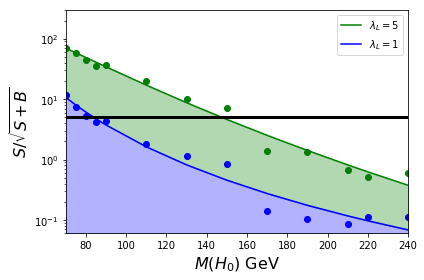

In [53]:
plot_fit(df,MHp=700,Lumi=30000,ymin=0.06,ymax=300,LaL1=5,LaL2=1,dots=True)

File: Signif_MHp_700_Lum_30.pdf created


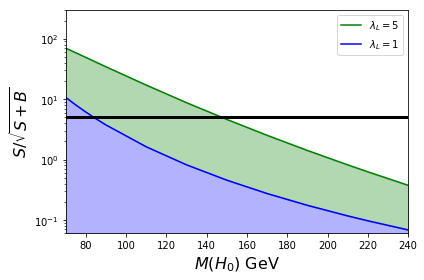

In [54]:
plot_fit(df,MHp=700,Lumi=30000,ymin=0.06,ymax=300,LaL1=5,LaL2=1,dots=False)

File: Signif_dots_MHp_250_Lum_30.pdf created


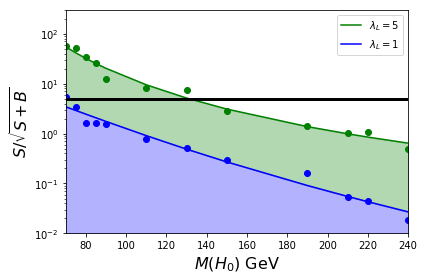

In [55]:
plot_fit(df,MHp=250,Lumi=30000,ymin=0.01,ymax=300,LaL1=5,LaL2=1,dots=True)

File: Signif_MHp_250_Lum_30.pdf created


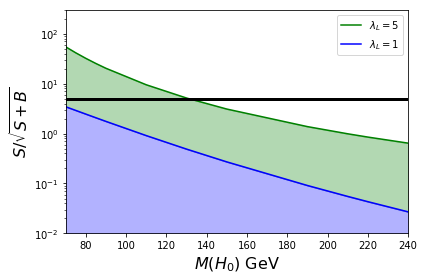

In [56]:
plot_fit(df,MHp=250,Lumi=30000,ymin=0.01,ymax=300,LaL1=5,LaL2=1,dots=False)

File: Signif_dots_MHp_700_Lum_100.pdf created


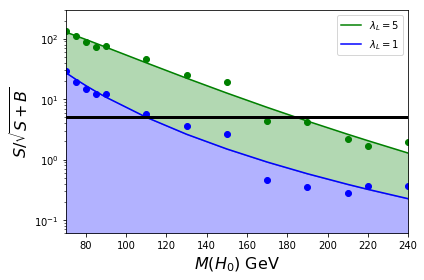

In [57]:
plot_fit(df,MHp=700,Lumi=100000.,ymin=0.06,ymax=300,LaL1=5,LaL2=1,dots=True)

File: Signif_MHp_700_Lum_100.pdf created


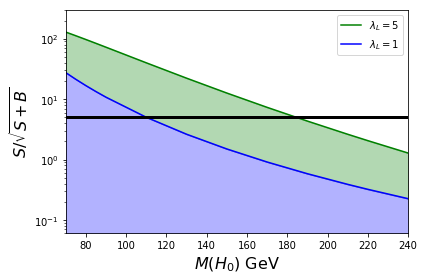

In [58]:
plot_fit(df,MHp=700,Lumi=100000.,ymin=0.06,ymax=300,LaL1=5,LaL2=1,dots=False)

File: Signif_dots_MHp_250_Lum_100.pdf created


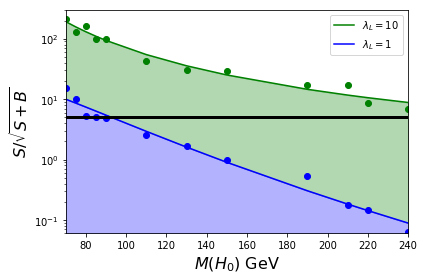

In [49]:
plot_fit(df,MHp=250,Lumi=100000.,ymin=0.06,ymax=300,LaL1=10,LaL2=1,dots=True)

File: Signif_MHp_250_Lum_100.pdf created


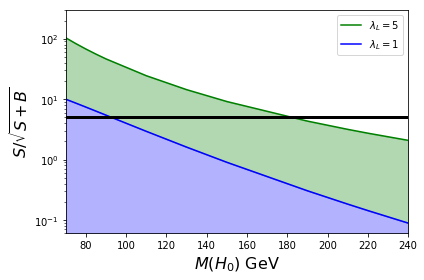

In [59]:
plot_fit(df,MHp=250,Lumi=100000.,ymin=0.06,ymax=300,LaL1=5,LaL2=1,dots=False)

## Low MH+=250 GeV 

# LUMINOSITY = 100 fb-1


## High MH+ 

In [18]:
Zvv=500.*(100./30) # Rescaling the expected background yield from 30 to 100 fb-1

TB=Zvv/0.7

def Z(S,B):
    return S/np.sqrt(S+B)

Lumi=100000.

LaL=np.array([0.01,0.02,0.05,0.07,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.0,3.0,5.0,7.0,10.0])

MH0=np.array([70,75,80,85,90,110,130,150,170,190,210,220,240])

#XS Matrix MHO (rows) * LaL (columns)
XS=np.array([[0.00783607575629,0.00747482126337,0.0070754665236,0.0067536191246,0.0064510490936,0.00541729727502,0.00450514743728,0.00375921068237,0.00320540710897,0.00267848607156,0.00227665480784,0.00209697543768,0.00175175111731],[0.00820650858184,0.00777080218416,0.00734962798323,0.0069370100351,0.0066226838262,0.00552263250849,0.00459905776702,0.00384839961038,0.00321932258602,0.00266578919844,0.00224653784862,0.00206443852413,0.00175533185608],[0.00977036213144,0.00881650013264,0.00813644023049,0.00763551355176,0.00719752367893,0.00577411696313,0.00474742502055,0.00397919891226,0.00328311418054,0.00278081244384,0.00231507054359,0.00210931366709,0.00177590124026],[0.011420910156,0.00991723213372,0.0089898149608,0.00827525303364,0.00762911789735,0.00604103126321,0.00491831776786,0.00407360249129,0.00339849158687,0.00282520633474,0.00235567126882,0.00215982084251,0.00180423451155],[0.0141261425284,0.0115380580022,0.0100772508372,0.00913874460108,0.00830156542016,0.00640568666986,0.00510558102448,0.00419036053004,0.00346030010049,0.0028745840313,0.00239995296473,0.00218483771474,0.00184266632757],[0.0199244023107,0.0150710532694,0.0125500477084,0.0109981420566,0.00976696266413,0.0070938080392,0.00542679204951,0.00442523806302,0.00363703285801,0.00297419670822,0.00249216109259,0.00225890914297,0.00188309960197],[0.0271880899908,0.0197415176028,0.0158114945573,0.0133155110342,0.0117125410659,0.00799662341219,0.00602154446212,0.00473041583628,0.00385873942405,0.00315903944048,0.00254254399698,0.00233999204944,0.00194357104849],[0.0368390612651,0.0252109121861,0.0194860982444,0.0161147716505,0.0137569481748,0.00881569794804,0.0064548956078,0.005012030082,0.00405513563802,0.00323430260427,0.00265472306713,0.00243026454045,0.0019829645914],[0.0477417695661,0.0316975111695,0.0238740797744,0.0192376955626,0.0161976627504,0.00998088027677,0.00712239023152,0.00538841435699,0.00422531855685,0.00341865377609,0.00278731658182,0.00250914774171,0.00207481178219],[0.0597594640654,0.0391662561018,0.028821592883,0.022677722633,0.0188525187018,0.0111328469037,0.00775519019637,0.00574773540242,0.00451934291073,0.00355335003647,0.00289616277128,0.00261797622203,0.0021114508465],[0.0747956609518,0.0471382414448,0.0344983621758,0.0269670368818,0.0218295047684,0.0123661452119,0.00837222196693,0.00609279302469,0.00471057123249,0.00377991267025,0.00298606059531,0.00268121291098,0.00219558795724],[0.0910331287797,0.0567195719991,0.0403238163796,0.0310156215494,0.0250082748573,0.0136586156079,0.00907664301072,0.00658094533258,0.00500074299141,0.0039222600236,0.00312041844648,0.00277151342242,0.00228000711703],[0.107349388867,0.0656615481849,0.0465501253039,0.0360118243404,0.028576983123,0.0150524151214,0.00974113895248,0.0069750996649,0.00531461201434,0.00406819587094,0.00324091018643,0.00291883552383,0.00234128604466],[0.128043336128,0.0776237164167,0.0546097312013,0.0411755041257,0.0329947443675,0.0168543255501,0.0105431991354,0.00757444269303,0.00555879160621,0.00436459889587,0.00336931176585,0.00304028612383,0.00243809329108],[0.148695199269,0.090430645976,0.062674638844,0.0468132159563,0.0371150703981,0.018467720921,0.0116123492597,0.00802164436335,0.00582249375999,0.00456686473905,0.00353584411056,0.00318931593753,0.00255718993958],[0.380151397212,0.220473347428,0.148378942205,0.10656002523,0.0813605039088,0.0363423812252,0.020356914933,0.0130089520647,0.0090585052076,0.00652376877811,0.00489306516721,0.00423612392131,0.00329366179214],[3.24118473343,1.80212692796,1.17242330113,0.806867070297,0.603144333312,0.232872807677,0.114865352706,0.0646187944466,0.039699264752,0.0258472880513,0.0176354821901,0.0144681451833,0.0104482973562],[8.89427127628,4.92561586887,3.21912245078,2.25165545869,1.66314074829,0.635800506275,0.307443775785,0.168008418494,0.0996303321782,0.0623872431225,0.0417083022784,0.0340446574429,0.0238635636445],[17.8456821254,10.0440353143,6.56851555905,4.60076987107,3.39608947093,1.29049388377,0.62990145001,0.340561430381,0.198830653949,0.125181831838,0.082151306954,0.0657439627299,0.0453819909586],[38.1134563225,21.7394077983,14.2477022061,10.24165998,7.58446024417,2.96801902408,1.44282132676,0.785372567661,0.455678455194,0.281172708507,0.181313261152,0.145525755642,0.0986417773555]])

#Efficiency Matrix LaL (rows) * MH0 (columns)
Eff=np.array([[4.266389177939646, 5.104166666666667, 5.056759545923633, 4.855371900826446, 5.925155925155925, 6.029106029106029, 5.405405405405405, 3.9337474120082816, 5.882352941176471, 4.024767801857585, 3.711340206185567, 3.112033195020747, 2.883625128733265, 4.72764645426516, 2.7892561983471076, 3.4232365145228214, 2.8125, 2.158273381294964, 1.5432098765432098, 1.842374616171955],[4.878048780487805, 4.179728317659352, 6.139438085327783, 5.077720207253886, 5.807814149947202, 6.340956340956341, 4.916317991631799, 4.158004158004158, 4.488517745302714, 5.318039624608968, 4.583333333333333, 4.126984126984127, 4.612159329140461, 3.905447070914697, 4.564315352697095, 3.374233128834356, 3.58974358974359, 2.6859504132231407, 2.4691358024691357, 1.8329938900203666],[4.1623309053069715, 5.090137857900318, 4.680851063829787, 7.142857142857143, 5.7591623036649215, 4.702194357366771, 5.2301255230125525, 5.735140771637122, 5.192107995846314, 5.648535564853557, 6.521739130434782, 5.104166666666667, 4.72193074501574, 4.2752867570385815, 3.7267080745341614, 3.4161490683229814, 3.4055727554179565, 2.674897119341564, 3.501544799176107, 1.629327902240326],[5.186721991701245, 5.175983436853002, 6.15866388308977, 5.38860103626943, 4.311251314405888, 3.473684210526316, 4.512067156348373, 5.08298755186722, 5.175983436853002, 6.204756980351603, 5.77124868835257, 4.235537190082645, 4.947368421052632, 4.8353909465020575, 4.658385093167702, 3.7460978147762747, 3.29557157569516, 2.579979360165119, 1.954732510288066, 1.5337423312883436],[6.673728813559322, 4.439746300211416, 5.857740585774058, 5.654450261780105, 5.69620253164557, 5.2356020942408374, 5.931321540062435, 4.668049792531121, 5.503634475597092, 4.916317991631799, 4.826862539349423, 5.136268343815513, 4.916317991631799, 4.569055036344756, 4.583333333333333, 5.104166666666667, 3.9215686274509802, 3.822314049586777, 2.263374485596708, 1.9387755102040816],[6.327800829875518, 5.077720207253886, 4.041450777202073, 6.309148264984227, 4.811715481171548, 3.907074973600845, 5.968586387434555, 4.483837330552659, 5.093555093555094, 5.077720207253886, 5.042016806722689, 4.7418335089567965, 6.1139896373057, 5.279503105590062, 5.584281282316443, 4.66321243523316, 3.71900826446281, 4.123711340206185, 3.4161490683229814, 2.7522935779816513],[5.368421052631579, 4.682622268470343, 4.72193074501574, 5.306971904266389, 5.368421052631579, 4.953560371517028, 6.197478991596639, 4.756980351602896, 5.368421052631579, 5.29595015576324, 7.210031347962382, 5.031446540880503, 4.6875, 7.596253902185223, 5.9436913451511995, 5.093555093555094, 3.9542143600416235, 3.508771929824561, 3.172978505629478, 3.711340206185567],[4.636459430979979, 5.219206680584551, 4.994686503719447, 4.37956204379562, 5.46218487394958, 6.342494714587738, 5.7591623036649215, 5.543933054393306, 6.282722513089006, 5.7531380753138075, 4.931794333683106, 5.323590814196242, 5.96234309623431, 5.383022774327122, 4.831932773109243, 5.8212058212058215, 4.747162022703819, 4.410256410256411, 2.7720739219712525, 3.873598369011213],[3.199174406604747, 4.43298969072165, 4.375, 3.008298755186722, 3.441084462982273, 3.067484662576687, 2.2082018927444795, 2.57201646090535, 1.9874476987447698, 1.8518518518518519, 2.57201646090535, 1.875, 1.981230448383733, 1.7782426778242677, 1.7838405036726128, 1.36986301369863, 1.2435233160621761, 1.256544502617801, 1.365546218487395, 1.0298661174047374],[4.241781548250265, 5.613305613305613, 4.016477857878476, 3.0239833159541187, 3.757828810020877, 2.7921406411582215, 3.125, 2.4870466321243523, 2.8095733610822062, 2.059732234809475, 3.490759753593429, 1.975051975051975, 1.5608740894901145, 1.4492753623188406, 1.9668737060041408, 1.4462809917355373, 1.7400204708290685, 1.954732510288066, 1.1506276150627615, 1.1482254697286012],[4.895833333333333, 3.4627492130115427, 4.712041884816754, 3.7735849056603774, 4.0582726326742975, 3.913491246138002, 3.586497890295359, 3.638253638253638, 3.4161490683229814, 3.209109730848861, 2.286902286902287, 2.47167868177137, 2.9804727646454263, 2.5906735751295336, 2.1761658031088085, 1.5657620041753653, 1.8691588785046729, 1.4553014553014554, 2.0876826722338206, 1.251303441084463],[5.3125, 6.145833333333333, 4.692387904066736, 4.075235109717869, 4.597701149425287, 3.653444676409186, 3.1023784901758016, 3.402061855670103, 4.253112033195021, 4.024767801857585, 3.8906414300736065, 3.0239833159541187, 3.2528856243441764, 3.2854209445585214, 3.490759753593429, 2.36382322713258, 2.7720739219712525, 1.3388259526261586, 1.5511892450879008, 1.9467213114754098],[4.149377593360996, 4.416403785488959, 4.6777546777546775, 4.054054054054054, 5.174234424498416, 4.248704663212435, 3.426791277258567, 3.3057851239669422, 3.6496350364963503, 2.272727272727273, 2.7139874739039667, 4.028925619834711, 3.319502074688797, 2.711157455683003, 3.209109730848861, 2.9958677685950414, 2.4896265560165975, 2.2540983606557377, 2.277432712215321, 1.3238289205702647]])

Evts=Lumi*(XS.transpose())*(Eff/100)

Significance=Z(Evts,TB)

Uncertainty=np.sqrt(0.1**2+(np.sqrt(30)/30)**2) #Uncertainty from 8 TeV analysis + statistical uncertainty from MC samples
print Uncertainty

0.208166599947


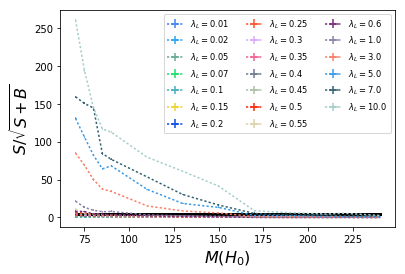

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in xrange(len(LaL)):
    ax.errorbar(MH0,Significance.transpose()[i], xerr=0.1, yerr=Uncertainty, linestyle='dotted', 
                label='$\lambda_{L}=$'+str(LaL[i]), color=np.random.rand(3,1))
#ax.errorbar(MH0,Significance.transpose()[0], xerr=0.1, yerr=Uncertainty, linestyle='dotted', label='$\lambda_{L}=0.01$')
#ax.errorbar(MH0,Significance.transpose()[-1], xerr=0.1, yerr=Uncertainty, linestyle='dotted', label='$\lambda_{L}=10.0$')
#ax.plot(MH0,Significance.transpose()[0],color="red",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[5],color="blue",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[10],color="green",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[15],color="yellow",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[18],color="magenta",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[-1],color="black",linestyle='solid')
ax.plot((MH0[0],MH0[-1]),(5.0,5.0),linewidth=3,color="black",linestyle='solid')
#ax.axhline(y=10.0, xmin=MH0[0], xmax=MH0[-1], linewidth=10, color = 'k')
#ax.set_yscale('log')
ax.set_ylabel(r'$S/\sqrt{S+B}$', fontsize=16)
ax.set_xlabel(r'$M(H_{0})$', fontsize=16)
legend = ax.legend(loc='upper right', shadow=False, fontsize='small', ncol=3)
plt.show()

[  -1.19405622  247.02716501]


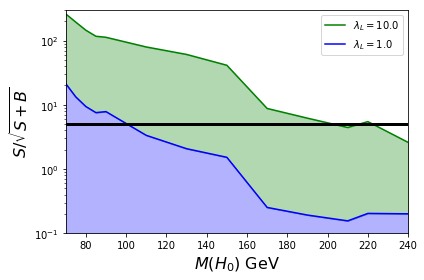

In [20]:
#def func(x,a,b,c):
#    return a+b*np.exp(c*x) #a+b*x+c*x**2
#####LambdaExp = lambda t,a,b,c: a*(b**(c*t))+70
#####x0 = np.array([0.0, 1.0, -1.0])
sigma1 = Significance.transpose()[-1]*0.1
sigma2 = Significance.transpose()[-5]*0.1
#FitResult1=optimization.curve_fit(func, MH0,Significance.transpose()[-1])
#####FitResult1=optimization.curve_fit(LambdaExp, MH0,Significance.transpose()[-1],p0=(140, -1.0))
FitResult1=np.polyfit(MH0,Significance.transpose()[-1],1)
print FitResult1
#FitResult1=optimization.curve_fit(func, MH0,Significance.transpose()[-1])
#FitResult2=optimization.curve_fit(func, MH0,Significance.transpose()[-5], x0, sigma2)

#Fill areas
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(MH0,Significance.transpose()[-1],color='g',linestyle='solid', label='$\lambda_{L}=10.0$')
#ax1.plot(MH0,LambdaExp(MH0, FitResult1[0][0], FitResult1[0][1]),
#         color='r',linestyle='solid', label='$\lambda_{L}=10.0$')
#ax1.plot(MH0,func(MH0, FitResult1[0][0], FitResult1[0][1], FitResult1[0][2], FitResult1[0][3], FitResult1[0][4]),
#         color='r',linestyle='solid', label='$\lambda_{L}=10.0$')
#ax1.plot(MH0,PolyNarray(MH0, FitResult1), color='r',linestyle='solid', label='$\lambda_{L}=10.0$')
ax1.plot(MH0,Significance.transpose()[-5],color='b',linestyle='solid', label='$\lambda_{L}=1.0$')
#ax1.plot(MH0,func(MH0, FitResult2[0][0], FitResult2[0][1], FitResult2[0][2], FitResult2[0][3], FitResult2[0][4]),
#         color='r',linestyle='solid', label='$\lambda_{L}=1.0$')
ax1.fill_between(MH0, Significance.transpose()[-1], Significance.transpose()[-5], color='green', alpha=0.3)
ax1.fill_between(MH0, Significance.transpose()[-5], np.zeros_like(Significance.transpose()[0])+0.06, color='blue', alpha=0.3)

#ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(left=MH0[0],right=MH0[-1])
ax1.set_ylim(bottom=0.1,top=300)
ax1.set_xlabel(r'$M(H_{0})$ GeV', fontsize=16)
ax1.set_ylabel(r'$S/\sqrt{S+B}$', fontsize=16)
ax1.plot((MH0[0],MH0[-1]),(5.0,5.0),linewidth=3,color="black",linestyle='solid')

legend1 = ax1.legend(loc='upper right', shadow=False)
plt.tight_layout()
plt.savefig('excls.pdf')